In [422]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [423]:
def init_parameters(len_weights_vector):
    """Initializes the weights of all the features and the bias to 0."""
    weights = np.zeros((1, len_weights_vector)) # 1 row vector of weights. 
    bias = 0
    return weights, bias

In [424]:
def forward_prop(X, W, b):  #W-->1xn, X-->nxm n=#features, m=#training samples.
    """Returns the predictions vector."""
    y_predictions = np.dot(W, X) + b  #y_predictions--> 1xm B = [b b b]--> 1xm
    return y_predictions

In [425]:
def cost_function(y_predictions, y):# z->1xm, y->1xm
    """returns the error between the predictions and the actual values."""
    
    m = y.shape[1] # number of training samples.
    # Mean squared error.
    j = (1/(2 * m)) * np.sum(np.square(y_predictions - y))
    return j   

In [426]:
def back_prop(X, y, y_predictions): #x-->nxm, y->1xm, y_predictions->1xm
    """Returns the partial derivatives for the weights and bias."""
    m = y.shape[1] # number of training samples.
    # rate of change of cost function with respect to the predictions vector.
    d_yhat = (1 / m) * (y_predictions - y)  #dz -> 1xm
    # rate of change of cost function with respect to the weights vector.
    dw = np.dot(d_yhat, X.T) #dw ->1xn.
    # rate of change of cost function with respect to the bias vector.
    db = np.sum(d_yhat)  #db -> 1xm.
    
    return dw, db

In [427]:
def gradient_descent_update(w, b, dw, db, learning_rate): #learning rate is a constant.
    """Returns the updated values for the weights and bias."""
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

In [428]:
def linear_regression_model(X_train, y_train, X_test, y_test, learning_rate, epochs):#epochs is how many iterations through the training data.
    
    len_weights_vector = X_train.shape[0] # number of rows(features).
    w, b = init_parameters(len_weights_vector)
    
    costs_train = []
    m_train = y_train.shape[1] # number of training samples.
    m_test = y_test.shape[1] # number of test samples.
    
    for i in range(1, epochs + 1):# epochs + 1 cuz we are starting from 1 not 0
        # predictions for the train dataset.
        y_predictions_train = forward_prop(X_train, w, b)
        # computation of cost function for the training dataset.
        cost_train = cost_function(y_predictions_train, y_train)
        # compute the rates of changes of the cost function with respect to the weights and bias.
        dw, db = back_prop(X_train, y_train, y_predictions_train)
        # re-assign values to the weights and bias to minimize the error.
        w, b = gradient_descent_update(w, b, dw, db, learning_rate)
        
        # store all training costs in a list for plotting.
        if i % 10 ==0: # for every 10 iterations.
            costs_train.append(cost_train)
        
        # Mean absolute error for the training dataset.
        MAE_train = (1 / m_train) * np.sum(np.abs(y_predictions_train - y_train))
        
        # cost function, MAE for the test set.
        y_predictions_test = forward_prop(X_test, w, b)
        cost_test = cost_function(y_predictions_test, y_test)
        MAE_test = (1 / m_test) * np.sum(np.abs(y_predictions_test - y_test))
        
        # print the cost_train, cost_test, MAE_train, MAE_test
        print('Epochs' + str(i) + '/' + str(epochs) + ': ')
        print('Training cost ' + str(cost_train) + '|' + "test cost " + str(cost_test))
        print('Training MAE ' + str(MAE_train) + '|' + "test MAE " + str(MAE_test))
        
        
    # plotting the training costs per 10 iterations to check if the error is decreasing or not.
    plt.plot(costs_train)
    plt.xlabel('Iterations per tens')
    plt.ylabel('Training cost')
    plt.title('Learning rate ' + str(learning_rate))
    plt.show()

# It's time to test our model.

In [429]:
from sklearn.datasets import load_boston

In [430]:
boston = load_boston()

In [431]:
# Boston is a dictionary containing key value pairs(e.g. data, target, feature_names).
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [432]:
# we have 13 features for our dataset.
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [433]:
# 506 data samples and 13 features in our dataset.
boston['data'].shape

(506, 13)

In [434]:
# insert the data with their 13 features into a dataframe.
df = pd.DataFrame(boston['data'], columns = boston['feature_names'])

In [435]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [436]:
# we have no missing data in our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [437]:
# our target value. that we would like to predict
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [438]:
# normalize the input matrix so the data ranges between -1 to +1 with a mean of 0
# for gradient descent to work faster.
# Mean normalization.
X = (df - df.mean()) / (df.max() - df.min())

In [439]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-7.021173e-18,7.898820e-18,-7.828608e-16,-1.579764e-17,6.389268e-16,-1.544219e-15,-3.405269e-16,1.404235e-16,0.000000,2.808469e-17,-2.341561e-15,1.976460e-15,-1.088282e-16
std,9.667929e-02,2.332245e-01,2.514792e-01,2.539940e-01,2.384314e-01,1.346268e-01,2.898956e-01,1.914822e-01,0.378576,3.216357e-01,2.303134e-01,2.302054e-01,1.970492e-01
min,-4.054410e-02,-1.136364e-01,-3.913775e-01,-6.916996e-02,-3.491668e-01,-5.218690e-01,-6.763636e-01,-2.423813e-01,-0.371713,-4.222083e-01,-6.229291e-01,-8.985678e-01,-3.014090e-01
25%,-3.969297e-02,-1.136364e-01,-2.179904e-01,-6.916996e-02,-2.174795e-01,-7.647718e-02,-2.425325e-01,-1.541223e-01,-0.241279,-2.466358e-01,-1.122908e-01,4.716191e-02,-1.573693e-01
50%,-3.773202e-02,-1.136364e-01,-5.303441e-02,-6.916996e-02,-3.435197e-02,-1.458793e-02,9.191657e-02,-5.343258e-02,-0.197800,-1.493075e-01,6.324111e-02,8.766445e-02,-3.568055e-02
75%,7.143872e-04,1.136364e-02,2.552500e-01,-6.916996e-02,1.426028e-01,6.492922e-02,2.626169e-01,1.267068e-01,0.628287,4.919138e-01,1.855815e-01,9.973011e-02,1.187069e-01
max,9.594559e-01,8.863636e-01,6.086225e-01,9.308300e-01,6.508332e-01,4.781310e-01,3.236364e-01,7.576187e-01,0.628287,5.777917e-01,3.770709e-01,1.014322e-01,6.985910e-01


In [440]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.040544,0.066364,-0.323562,-0.06917,-0.034352,0.055636,-0.034757,0.026822,-0.371713,-0.214193,-0.335695,0.101432,-0.211729
1,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.026129,0.106335,0.106581,-0.328235,-0.317246,-0.069738,0.101432,-0.096939
2,-0.040308,-0.113636,-0.149075,-0.06917,-0.176327,0.172517,-0.076981,0.106581,-0.328235,-0.317246,-0.069738,0.091169,-0.237943
3,-0.040251,-0.113636,-0.328328,-0.06917,-0.198961,0.136686,-0.234551,0.206163,-0.284757,-0.355414,0.026007,0.095708,-0.268021
4,-0.039839,-0.113636,-0.328328,-0.06917,-0.198961,0.165236,-0.148042,0.206163,-0.284757,-0.355414,0.026007,0.101432,-0.202071


In [441]:
# our target variable we would like to predict.
y = boston['target']

In [442]:
# 506 targets.
y.shape

(506,)

In [443]:
from sklearn.model_selection import train_test_split

In [444]:
# split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [445]:
# 339 data samples out of the 506.
X_train.shape

(339, 13)

In [446]:
# the manually written model above requires the X_training of dimension
# (number_features x number_training_examples)
# transpose of X_train
X_train = X_train.T
X_train.shape

(13, 339)

In [447]:
y_train.shape

(339,)

In [448]:
# the manually written model above requries the y_train of dimension
# (1xm_train where m_train = number of training data.)
y_train = np.array([y_train])
y_train.shape

(1, 339)

In [449]:
# similarly for the test set.
X_test = X_test.T
X_test.shape

(13, 167)

In [450]:
y_test = np.array([y_test])
y_test.shape

(1, 167)

Epochs1/500: 
Training cost 293.87502949852507|test cost 134.03952819592888
Training MAE 22.53716814159292|test MAE 13.558080443847112
Epochs2/500: 
Training cost 126.29007943286858|test cost 72.53024841900947
Training MAE 13.556920515044165|test MAE 8.567173211994337
Epochs3/500: 
Training cost 64.48605249549566|test cost 49.185779370784566
Training MAE 8.584464564354887|test MAE 6.31150796331822
Epochs4/500: 
Training cost 41.11837291662819|test cost 39.862788313569226
Training MAE 6.132581495701579|test MAE 5.546871762049199
Epochs5/500: 
Training cost 31.8464749408043|test cost 35.793142957204076
Training MAE 5.146516386528717|test MAE 5.286502193398581
Epochs6/500: 
Training cost 27.83511268481864|test cost 33.76085227950457
Training MAE 4.895580497212939|test MAE 5.277031480869301
Epochs7/500: 
Training cost 25.850905902447806|test cost 32.564577727950024
Training MAE 4.834550492911536|test MAE 5.297071354069098
Epochs8/500: 
Training cost 24.69226634260085|test cost 31.740922148

Training cost 10.755057861289298|test cost 15.311152271157184
Training MAE 3.2195667251290767|test MAE 3.6054491544827907
Epochs152/500: 
Training cost 10.744060477193706|test cost 15.2956837133443
Training MAE 3.21840767444341|test MAE 3.6032726708620837
Epochs153/500: 
Training cost 10.733259196033291|test cost 15.280473588631342
Training MAE 3.2172567842698605|test MAE 3.601107929769881
Epochs154/500: 
Training cost 10.722649685685509|test cost 15.26551640597403
Training MAE 3.2161139688432216|test MAE 3.598954873116646
Epochs155/500: 
Training cost 10.712227721126883|test cost 15.250806808572326
Training MAE 3.2149791435832413|test MAE 3.596813442763673
Epochs156/500: 
Training cost 10.70198918151109|test cost 15.236339570233511
Training MAE 3.2138604964921047|test MAE 3.5946835805319663
Epochs157/500: 
Training cost 10.691930047335543|test cost 15.222109591844449
Training MAE 3.212881124408655|test MAE 3.5925652282109315
Epochs158/500: 
Training cost 10.682046397693536|test cost 1

Epochs283/500: 
Training cost 10.124564056216089|test cost 14.387352833924938
Training MAE 3.1667839141525027|test MAE 3.460058787620438
Epochs284/500: 
Training cost 10.12261029450358|test cost 14.384436313764862
Training MAE 3.1666179087989494|test MAE 3.4596991617523196
Epochs285/500: 
Training cost 10.120673589659534|test cost 14.381547491939786
Training MAE 3.166451464619238|test MAE 3.4593404828331895
Epochs286/500: 
Training cost 10.118753698653965|test cost 14.378686026941331
Training MAE 3.166284595041523|test MAE 3.4590071199823984
Epochs287/500: 
Training cost 10.116850383028215|test cost 14.375851583116802
Training MAE 3.1661173132850866|test MAE 3.4586790604073903
Epochs288/500: 
Training cost 10.114963408798346|test cost 14.373043830548156
Training MAE 3.165949632363415|test MAE 3.4583518761978724
Epochs289/500: 
Training cost 10.113092546360686|test cost 14.37026244493368
Training MAE 3.1657815650872148|test MAE 3.458028531755727
Epochs290/500: 
Training cost 10.11123757

Epochs423/500: 
Training cost 9.95190504952951|test cost 14.152414855962585
Training MAE 3.148571971050878|test MAE 3.4314778143558926
Epochs424/500: 
Training cost 9.95112178065811|test cost 14.151548909953899
Training MAE 3.148479395237443|test MAE 3.4313321946965307
Epochs425/500: 
Training cost 9.950342552851996|test cost 14.150690437710452
Training MAE 3.148386848972738|test MAE 3.4311872432192385
Epochs426/500: 
Training cost 9.949567337368045|test cost 14.149839384077668
Training MAE 3.148294334443622|test MAE 3.4310429587189644
Epochs427/500: 
Training cost 9.948796105782856|test cost 14.148995694413655
Training MAE 3.148201853802851|test MAE 3.4308993399644243
Epochs428/500: 
Training cost 9.94802882998765|test cost 14.148159314582406
Training MAE 3.148109409169524|test MAE 3.4307563856987167
Epochs429/500: 
Training cost 9.94726548218332|test cost 14.147330190947141
Training MAE 3.1480170026295293|test MAE 3.430614094639912
Epochs430/500: 
Training cost 9.946506034875515|test

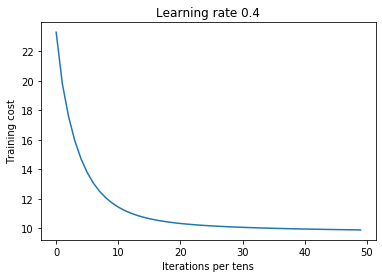

In [451]:
# feeding prepared dataset into our learning regression model.
# notice from the plot our model training cost and test cost is decreasing after more iterations of training.
linear_regression_model(X_train, y_train, X_test, y_test, 0.4, 500)

# Compare the accuracy of our model with the model from sklearn

In [452]:
from sklearn import linear_model

In [453]:
linear_regression = linear_model.LinearRegression()
# the model in sklearn requires(mxn X matrix where m is # data samples, n is number of features).
# also y vector of dimensions mx1
model = linear_regression.fit(X_train.T, y_train.T) 
predictions = linear_regression.predict(X_test.T)

In [454]:
predictions.shape

(167, 1)

In [455]:
# The mean absolute error of the test set with the sklearn model.
MAE_test_with_sklearn = (1 / y_test.shape[1]) * np.sum(np.abs(predictions - y_test.T))
MAE_test_with_sklearn

3.455034932248353

# We conclude that the MAE of our manually written multivariate_linear_regression model is less than that of the sklearn model.